## Imports

- augment.ipynb is a class that contains functions to help with image augmentation

In [31]:
%matplotlib inline
import numpy as np
import random
import time
import matplotlib.pyplot as plt

%run augment.ipynb
%run preprocess.ipynb

## General

In [32]:
seed = 7
np.random.seed(seed)

In [33]:
train_data_file = open(train_file, 'r')
train_data_list = train_data_file.readlines()  # read all lines into memory
train_data_file.close()

test_data_file = open(test_file, 'r')  # read the file
test_data_list = test_data_file.readlines()
test_data_file.close()

In [34]:
## Amount of data to test on
train_amount = 1500

ann_pre = Preprocess(is_neural=True) ## preprocssing object for neural network
knn_pre = Preprocess(is_neural=False) ## preprocessing object for k-NN

## ANN Data Preprocessing

In [35]:
mini_training_data = ann_pre.generate_mini_data(train_data_list, train_amount)

X_train, y_train = ann_pre.preprocess_data(mini_training_data)
X_test, y_test = ann_pre.preprocess_data(test_data_list)

print(len(X_train))
print(len(X_test))

1500
10000


Here we create an instance of the AugmentImages class.

In [36]:
a_nn = AugmentImages(is_neural=True)

### We use the 'AugmentImages' class to apply image rotation to the training data

In [37]:
training_data = a_nn.augment_data(X_train, y_train, rotation=15)

In [38]:
images = training_data['images']
labels = training_data['labels']

for num in range(0, len(images)):
    X_train.append(images[num])

for num in range(0, len(labels)):
    y_train.append(labels[num])

# shuffle training values and labels while still keeping order
X_train, y_train = a_nn.shuffle_data(X_train, y_train, 3000)
    
print(len(X_train))

3000


## Visualize change in images

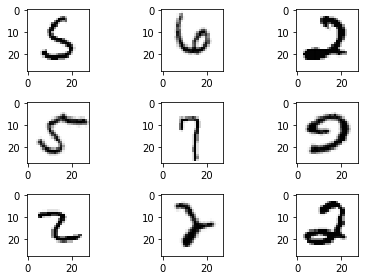

In [39]:
for i in range(0,9):
    val = random.randint(0, len(X_train))
    plt.subplot(330 + 1 + i)
    plt.imshow(np.asfarray(X_train[val].flatten().reshape((28,28))), cmap='Greys', interpolation='None')

plt.tight_layout()

#plt.savefig('rotated-images.png', dpi=300)
plt.show()

We see that the image rotation is applied to some of the existing images. 

## Test model accuracy

We train our model using the optimal hyperparameters obtained from Task1.

- 50 epochs
- 0.3 learning rate
- 1 batch size

In [40]:
n = NeuralNetwork(epochs=50, learningrate=0.3, batch_size=1)
n.train(X_train, y_train)

Training epoch#:  0
errors (SSE):  [1033.50727064]
Training epoch#:  1
errors (SSE):  [455.94823926]
Training epoch#:  2
errors (SSE):  [273.45712084]
Training epoch#:  3
errors (SSE):  [167.38556896]
Training epoch#:  4
errors (SSE):  [103.12157062]
Training epoch#:  5
errors (SSE):  [64.57781133]
Training epoch#:  6
errors (SSE):  [44.26421381]
Training epoch#:  7
errors (SSE):  [32.98567268]
Training epoch#:  8
errors (SSE):  [25.67244854]
Training epoch#:  9
errors (SSE):  [20.2366036]
Training epoch#:  10
errors (SSE):  [16.72208691]
Training epoch#:  11
errors (SSE):  [14.1966218]
Training epoch#:  12
errors (SSE):  [12.43098677]
Training epoch#:  13
errors (SSE):  [11.14195545]
Training epoch#:  14
errors (SSE):  [10.15498518]
Training epoch#:  15
errors (SSE):  [9.35814358]
Training epoch#:  16
errors (SSE):  [8.67191427]
Training epoch#:  17
errors (SSE):  [8.08305024]
Training epoch#:  18
errors (SSE):  [7.57141546]
Training epoch#:  19
errors (SSE):  [7.13762155]
Training ep

In [41]:
n.test(X_test, y_test)
acc = n.evaluate(n.results)
acc

93.04

## Test accuracy on multiple rotations

Here we assess the impact on accuracy by increasing rotation values. <br>

We train each model using the optimal hyperparameters obtained from Task1.

- 50 epochs
- 0.3 learning rate
- 1 batch size

In [17]:
ann_results = []

rotations = [20, 40, 50, 90, 120]

for num in rotations:
    ## Clear and generate data again
    mini_training_data = ann_pre.generate_mini_data(train_data_list, train_amount)

    X_train, y_train = ann_pre.preprocess_data(mini_training_data)
    X_test, y_test = ann_pre.preprocess_data(test_data_list)
    
    model = a_nn.fit_augmented_model(X_train, y_train, X_test, y_test, train_amount, num)
     
    ann_results.append(model)

print(ann_results)

Shuffling data...
Training epoch#:  0
errors (SSE):  [637.77118903]
Training epoch#:  1
errors (SSE):  [305.03729148]
Training epoch#:  2
errors (SSE):  [190.00511517]
Training epoch#:  3
errors (SSE):  [120.57758058]
Training epoch#:  4
errors (SSE):  [74.98142377]
Training epoch#:  5
errors (SSE):  [48.84676442]
Training epoch#:  6
errors (SSE):  [32.76818002]
Training epoch#:  7
errors (SSE):  [22.70667336]
Training epoch#:  8
errors (SSE):  [16.5154269]
Training epoch#:  9
errors (SSE):  [12.50062412]
Training epoch#:  10
errors (SSE):  [10.13899351]
Training epoch#:  11
errors (SSE):  [8.54331231]
Training epoch#:  12
errors (SSE):  [7.37920548]
Training epoch#:  13
errors (SSE):  [6.50608289]
Training epoch#:  14
errors (SSE):  [5.83573309]
Training epoch#:  15
errors (SSE):  [5.29599305]
Training epoch#:  16
errors (SSE):  [4.85167191]
Training epoch#:  17
errors (SSE):  [4.48961644]
Training epoch#:  18
errors (SSE):  [4.18473345]
Training epoch#:  19
errors (SSE):  [3.9032942]

errors (SSE):  [4.43415822]
Training epoch#:  17
errors (SSE):  [3.95519437]
Training epoch#:  18
errors (SSE):  [3.57347113]
Training epoch#:  19
errors (SSE):  [3.2672359]
Training epoch#:  20
errors (SSE):  [3.02369596]
Training epoch#:  21
errors (SSE):  [2.82657414]
Training epoch#:  22
errors (SSE):  [2.65760308]
Training epoch#:  23
errors (SSE):  [2.51040382]
Training epoch#:  24
errors (SSE):  [2.38362446]
Training epoch#:  25
errors (SSE):  [2.27150248]
Training epoch#:  26
errors (SSE):  [2.17187668]
Training epoch#:  27
errors (SSE):  [2.08314674]
Training epoch#:  28
errors (SSE):  [2.00254263]
Training epoch#:  29
errors (SSE):  [1.92753068]
Training epoch#:  30
errors (SSE):  [1.85655879]
Training epoch#:  31
errors (SSE):  [1.78824101]
Training epoch#:  32
errors (SSE):  [1.72278649]
Training epoch#:  33
errors (SSE):  [1.66331178]
Training epoch#:  34
errors (SSE):  [1.60951937]
Training epoch#:  35
errors (SSE):  [1.56040866]
Training epoch#:  36
errors (SSE):  [1.515

# kNN

## Data Preprocessing

In [18]:
mini_training_data = knn_pre.generate_mini_data(train_data_list, train_amount)
mini_testing_data = knn_pre.generate_mini_data(test_data_list, 500) # reduce testing data to increase kNN testing speed 

X_train, y_train = knn_pre.preprocess_data(mini_training_data)
X_test, y_test = knn_pre.preprocess_data(mini_testing_data)

print(len(X_train))
print(len(X_test))

1500
500


## Image Augmentation

We create another instance of the AugmentImages class for the k-NN.

In [19]:
a_knn = AugmentImages(is_neural=False)

We apply image rotation to the training data.

In [20]:
training_data = a_knn.augment_data(X_train, y_train, rotation=20)

In [21]:
images = training_data['images']
labels = training_data['labels']

for num in range(0, len(images)):
    X_train.append(images[num])

for num in range(0, len(labels)):
    y_train.append(labels[num])

X_train, y_train = a_knn.shuffle_data(X_train, y_train, train_amount)
    
print(len(X_train))

1500


## Visualize change in images

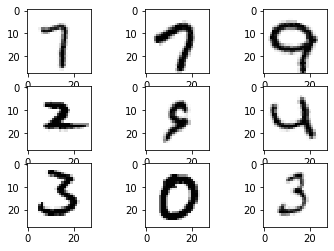

In [22]:
for i in range(0,9):
    val = random.randint(0, len(X_train))
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[val].flatten().reshape((28,28)), cmap='Greys', interpolation='None')
plt.show()

## Test model accuracy

We use the optimal hyperparameters obtained from Task2.

- k = 3
- Weighted = True

In [23]:
knn = kNN(X_train, y_train, k=3, weighted=True, sim=cosine_similarity)

start_time = time.time()
knn.test(X_test, y_test)
print('--- Training time in seconds: %s ---' % (time.time() - start_time))

print("kNN Accuracy on test set is: ", knn.evaluate(knn.results))

Testing...
Iteration# 200
Iteration# 400
Testing complete!
--- Training time in seconds: 9.139642715454102 ---
kNN Accuracy on test set is:  91.0


## Test kNN accuracy on multiple rotations

In [24]:
knn_results = []

rotations = [20, 40, 50, 90, 120]

for num in rotations:
    ## Clear and generate data again
    mini_training_data = knn_pre.generate_mini_data(train_data_list, train_amount)

    X_train, y_train = knn_pre.preprocess_data(mini_training_data)
    X_test, y_test = knn_pre.preprocess_data(mini_testing_data)
    
    model = a_knn.fit_augmented_model(X_train, y_train, X_test, y_test, train_amount, num)
    knn_results.append(model)

print(knn_results)

Shuffling data...
Testing...
Iteration# 200
Iteration# 400
Testing complete!
Shuffling data...
Testing...
Iteration# 200
Iteration# 400
Testing complete!
Shuffling data...
Testing...
Iteration# 200
Iteration# 400
Testing complete!
Shuffling data...
Testing...
Iteration# 200
Iteration# 400
Testing complete!
Shuffling data...
Testing...
Iteration# 200
Iteration# 400
Testing complete!
[89.4, 81.39999999999999, 85.0, 86.4, 83.39999999999999]


## Visualize difference in performance on increasing rotations between ANN and k-NN

[90.64999999999999, 84.13000000000001, 84.17, 84.28, 81.28999999999999]
[89.4, 81.39999999999999, 85.0, 86.4, 83.39999999999999]


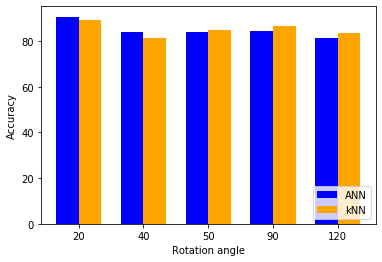

In [26]:
N = len(rotations)
ind = np.arange(N)

performance1 = ann_results
performance2 = knn_results

width = 0.35

print(performance1)
print(performance2)

plt.bar(ind, performance1, width, label="ANN", color='blue')
plt.bar(ind + width, performance2, width, label="kNN", color='orange')

plt.ylabel('Accuracy')
plt.xlabel('Rotation angle')

plt.xticks(ind + width / 2, rotations)
plt.legend(loc='lower right')

#plt.savefig("rotation.png", dpi=300)
plt.show()